# Autoencoders

## Teoria

* Processo de criar criptografia dos dados
* Principal função: **REDUÇÃO DA DIMENSIONALIDADE DOS DADOS**
    * Da esquerda para direita
* Técnica de aprendizagem não supervisionada
    * Self supervised learning: O próprio registro é uma classe

<img src = 'Imagens/autoencoder.png' width = '720'>

* Utilizam a redução de neurônios a partir de pesos aplicados em seus valores, e uma função de ativação na decodificação

* Podemos utilizar um autoencoder para aumentar o número de neurônios na base de dados (querendo dar uma  descrição mais detalhada)

    * Problema: Pode somente copiar o valor do neurônio, sendo assim não terá poder de discriminação dos neurônios
        * Solução: *Sparse autoencoder* usa a técnica de regularização para prever overfitting, e não usa todos os neurônios da camada oculta (os de valor pequeno)

* *Denoising autoencoder*: Modifica os valores da camada de entrada, alterando alguns neurônios para o valor zero
    * previne overfitting
    * a camada de saída é compararada com os valores originais, para obter o valor de erro

* *Contractive autoencoder*: Adiciona uma função de penalidade quando os pesos são atualizados
    * Se adaptar mais aos dados 


* *Deep autoencoder*: Vetor de característica comprimido (assim como o da figura) : stack-autoencoder

* *Convolutional autoencoder*: Redução da dimensionalidade de imagens

## Aplicação: Base de dados MNIST

### Importações

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

In [3]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

In [4]:
len(previsores_treinamento), len(previsores_teste)

(60000, 10000)

In [5]:
previsores_treinamento.shape

(60000, 28, 28)

In [6]:
# Normalização dos valores

previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [7]:
previsores_treinamento = previsores_treinamento.reshape(
    (len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:]))
)

In [8]:
previsores_treinamento.shape

(60000, 784)

In [9]:
previsores_teste = previsores_teste.reshape(
    (len(previsores_teste), np.prod(previsores_teste.shape[1:]))
)

In [10]:
previsores_teste.shape

(10000, 784)

### Aplicação do Autencoder

Temos 784 neurônios de entrada, queremos reduzi-lo a 32 neurônios e então voltar na camada de saída para 784 neurônios

In [11]:
fator_compactaçao = 784 / 32
fator_compactaçao

24.5

In [12]:
autoencoder = Sequential()

autoencoder.add(Dense(
    units = 32,
    activation= 'relu',
    input_dim = 784
))
autoencoder.add(Dense(
    units = 784,
    activation= 'sigmoid'
))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [30]:
autoencoder.compile(
    optimizer = 'adam',
    loss= 'binary_crossentropy',
    metrics = ['accuracy']
)

autoencoder.fit(
    previsores_treinamento,
    previsores_treinamento,
    epochs = 100,
    batch_size= 256,
    validation_data = (previsores_teste, previsores_teste)
)

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0916 - accuracy: 0.0123 - val_loss: 0.0906 - val_accuracy: 0.0125
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.0123 - val_loss: 0.0905 - val_accuracy: 0.0123
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.0124 - val_loss: 0.0905 - val_accuracy: 0.0123
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0915 - accuracy: 0.0124 - val_loss: 0.0906 - val_accuracy: 0.0115
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.0122 - val_loss: 0.0906 - val_accuracy: 0.0131
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.0123 - val_loss: 0.0906 - val_accuracy: 0.0133
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0915 - accuracy: 0.0122 - val_loss: 0.0906 - val_accuracy: 0.0130

In [31]:
previsores_teste

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
previsores_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
dimensao_original = Input(shape= (784,))
camada_encoder = autoencoder.layers[0]
encoder = Model(dimensao_original, camada_encoder(dimensao_original))
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [34]:
imagens_codificadas = encoder.predict( previsores_teste )

In [35]:
imagens_codificadas.shape

(10000, 32)

In [36]:
imagens_decodificadas = autoencoder.predict( previsores_teste )

In [37]:
imagens_decodificadas.shape

(10000, 784)

0
5741
1
7383
2
4557
3
3150
4
2321
5
7385
6
73
7
6524
8
8464
9
5071


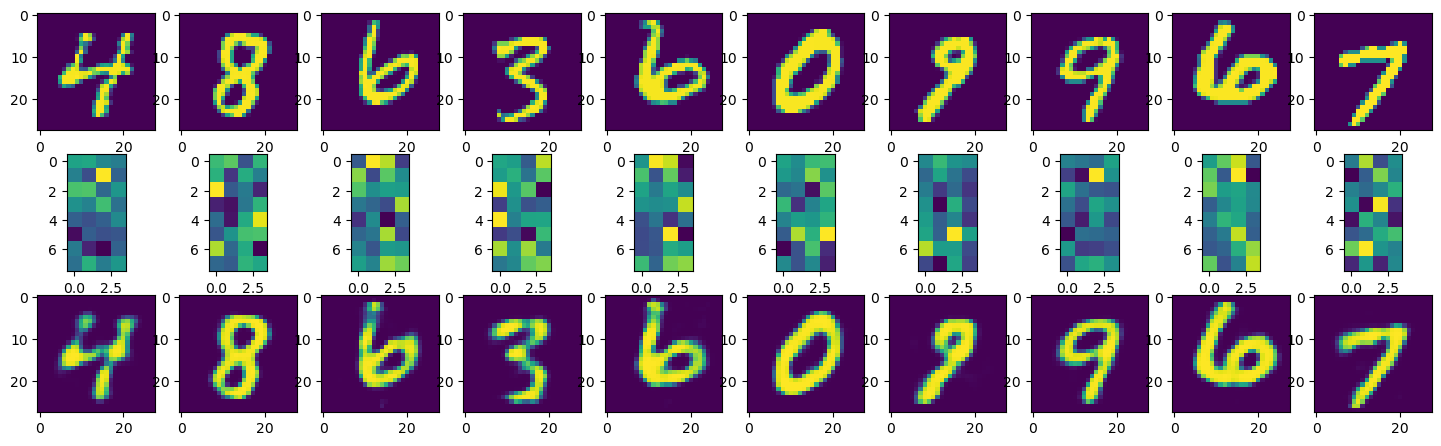

In [38]:
num_imagens = 10

imagens_teste = np.random.randint(previsores_teste.shape[0], size = num_imagens )

plt.figure( figsize = (18,18) )

for i, indice_imagem in enumerate(imagens_teste):
    print(i),
    print(indice_imagem),

    # Imagem Original
    eixto = plt.subplot(10, 10, i+1)
    plt.imshow(
        previsores_teste[indice_imagem].reshape( (28,28) )
    )
    plt.xticks()
    plt.yticks()

    # Imagem Codificada
    eixto = plt.subplot(10, 10, i+1 + num_imagens)
    plt.imshow(
        imagens_codificadas[indice_imagem].reshape( (8,4) )
    )
    plt.xticks()
    plt.yticks()

    # Imagem Reconstruida
    eixto = plt.subplot(10, 10, i+1 + num_imagens * 2)
    plt.imshow(
        imagens_decodificadas[indice_imagem].reshape( (28,28) )
    )
    plt.xticks()
    plt.yticks()

## COMPARAÇÃO DE CLASSIFICAÇÃO COM AUTOENCODER E SEM AUTOENCODER

### Import de Libs e dataset

In [42]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical 

In [43]:
(previsores_treinamento, classe_treinamento), (previsores_teste, classe_teste) = mnist.load_data()

In [44]:
# Normalização dos valores

previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [50]:
previsores_treinamento = previsores_treinamento.reshape(
    (len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:]))
)
previsores_teste = previsores_teste.reshape(
    (len(previsores_teste), np.prod(previsores_teste.shape[1:]))
)

In [51]:
previsores_treinamento.shape

(60000, 784)

In [52]:
previsores_teste.shape

(10000, 784)

### Preparando os datasets e criando o autoencoder

In [53]:
autoencoder = Sequential()

autoencoder.add(Dense(
    units = 32,
    activation= 'relu',
    input_dim = 784
))
autoencoder.add(Dense(
    units = 784,
    activation= 'sigmoid'
))

autoencoder.compile(
    optimizer = 'adam',
    loss= 'binary_crossentropy',
    metrics = ['accuracy']
)

autoencoder.fit(
    previsores_treinamento,
    previsores_treinamento,
    epochs = 50,
    batch_size= 256,
    validation_data = (previsores_teste, previsores_teste)
)

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2769 - accuracy: 0.0110 - val_loss: 0.1903 - val_accuracy: 0.0113
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1700 - accuracy: 0.0113 - val_loss: 0.1530 - val_accuracy: 0.0098
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1435 - accuracy: 0.0104 - val_loss: 0.1336 - val_accuracy: 0.0110
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1287 - accuracy: 0.0093 - val_loss: 0.1219 - val_accuracy: 0.0108
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1185 - accuracy: 0.0095 - val_loss: 0.1130 - val_accuracy: 0.0107
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1109 - accuracy: 0.0103 - val_loss: 0.1068 - val_accuracy: 0.0108
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1055 - accuracy: 0.0105 - val_loss: 0.1021 - val_accuracy: 0.0111
Epoch 

In [54]:
dimensao_original = Input(shape= (784,))
camada_encoder = autoencoder.layers[0]
encoder = Model(dimensao_original, camada_encoder(dimensao_original))

In [57]:
previsores_treinamento_codificados = encoder.predict( previsores_treinamento )

previsores_teste_codificados = encoder.predict( previsores_teste )

In [61]:
classe_treinamento.shape

(60000,)

In [58]:
classe_dummy_treinamento = to_categorical(classe_treinamento)

classe_dummy_teste = to_categorical(classe_teste)

In [59]:
classe_dummy_treinamento.shape

(60000, 10)

### Realizando a modelagem

#### SEM REDUÇÃO DE DIMENSIONALIDADE

In [62]:
c1 = Sequential()

c1.add(Dense(
    units = 397,
    activation= 'relu',
    input_dim= 784
))
c1.add(Dense(
    units = 397,
    activation= 'relu'
))
c1.add(Dense(
    units = 10,
    activation= 'softmax'
))

c1.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
c1.fit(
    previsores_treinamento, 
    classe_dummy_treinamento,
    batch_size = 256,
    epochs = 100,
    validation_data = (previsores_teste, classe_dummy_teste)   
)

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.2840 - accuracy: 0.9205 - val_loss: 0.1247 - val_accuracy: 0.9623
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1002 - accuracy: 0.9703 - val_loss: 0.0870 - val_accuracy: 0.9734
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0641 - accuracy: 0.9804 - val_loss: 0.0772 - val_accuracy: 0.9763
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0715 - val_accuracy: 0.9780
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0671 - val_accuracy: 0.9800
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0212 - accuracy: 0.9938 - val_loss: 0.0679 - val_accuracy: 0.9794
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0703 - val_accuracy: 0.9809

#### COM REDUÇÃO DE DIMENSIONALIDADE

In [64]:
previsores_treinamento_codificados.shape

(60000, 32)

In [63]:
c2 = Sequential()

c2.add(Dense(
    units = 21,
    activation= 'relu',
    input_dim= 32
))
c2.add(Dense(
    units = 21,
    activation= 'relu'
))
c2.add(Dense(
    units = 10,
    activation= 'softmax'
))

c2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
c2.fit(
    previsores_treinamento_codificados, 
    classe_dummy_treinamento,
    batch_size = 256,
    epochs = 100,
    validation_data = (previsores_teste_codificados, classe_dummy_teste)   
)

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 1.9574 - accuracy: 0.3981 - val_loss: 0.9876 - val_accuracy: 0.6899
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.7253 - accuracy: 0.7724 - val_loss: 0.5535 - val_accuracy: 0.8258
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4965 - accuracy: 0.8485 - val_loss: 0.4337 - val_accuracy: 0.8697
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.8744 - val_loss: 0.3831 - val_accuracy: 0.8859
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3839 - accuracy: 0.8866 - val_loss: 0.3577 - val_accuracy: 0.8950
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3599 - accuracy: 0.8946 - val_loss: 0.3366 - val_accuracy: 0.9016
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.8995 - val_loss: 0.3182 - val_accuracy: 0.9038

Neste caso, tivemos pouca melhoria

**SEM REDUÇÃO**
* Tempo de execução: 1min 36s
* Accuracy = 0.9857

**COM REDUÇÃO**
* Tempo de execução: 1min 29s
* Accuracy = 0.9524

## DEEP AUTOENCODERS

### Import de Libs e dataset

In [65]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical 

In [66]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

In [67]:
# Normalização dos valores

previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [68]:
previsores_treinamento = previsores_treinamento.reshape(
    (len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:]))
)
previsores_teste = previsores_teste.reshape(
    (len(previsores_teste), np.prod(previsores_teste.shape[1:]))
)

In [69]:
previsores_treinamento.shape

(60000, 784)

In [70]:
previsores_teste.shape

(10000, 784)

### Criação do autoencoder
Formato das dimensões do autoencoder:

784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784

In [72]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(
    units = 128,
    activation= 'relu',
    input_dim = 784
))
autoencoder.add(Dense(
    units = 64,
    activation= 'relu'
))
autoencoder.add(Dense(
    units = 32,
    activation= 'relu'
))

# Decode
autoencoder.add(Dense(
    units = 64,
    activation= 'relu'
))
autoencoder.add(Dense(
    units = 128,
    activation= 'relu'
))
autoencoder.add(Dense(
    units = 784,
    activation= 'sigmoid'
))

autoencoder.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_21 (Dense)             (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [73]:
autoencoder.compile(
    optimizer = 'adam',
    loss= 'binary_crossentropy',
    metrics = ['accuracy']
)

autoencoder.fit(
    previsores_treinamento,
    previsores_treinamento,
    epochs = 50,
    batch_size = 256,
    validation_data = (previsores_teste, previsores_teste)
)

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2550 - accuracy: 0.0094 - val_loss: 0.1713 - val_accuracy: 0.0110
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1521 - accuracy: 0.0110 - val_loss: 0.1359 - val_accuracy: 0.0093
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1303 - accuracy: 0.0106 - val_loss: 0.1232 - val_accuracy: 0.0095
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1213 - accuracy: 0.0109 - val_loss: 0.1172 - val_accuracy: 0.0116
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1157 - accuracy: 0.0116 - val_loss: 0.1118 - val_accuracy: 0.0110
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1107 - accuracy: 0.0114 - val_loss: 0.1072 - val_accuracy: 0.0125
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1070 - accuracy: 0.0115 - val_loss: 0.1052 - val_accuracy: 0.0087
Epoch 

In [75]:
dimensao_original = Input(shape = (784,))

camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]

encoder = Model(
    dimensao_original,
    camada_encoder3(
        camada_encoder2(
            camada_encoder1(
                dimensao_original
            )
        )
    )
)

encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [82]:
imagens_codificadas = encoder.predict( previsores_teste )
imagens_decodificadas = autoencoder.predict( previsores_teste )

In [83]:
imagens_codificadas.shape

(10000, 32)

In [84]:
imagens_decodificadas.shape

(10000, 784)

0
1073
1
4771
2
3093
3
3875
4
404
5
1607
6
1669
7
5935
8
9241
9
5189


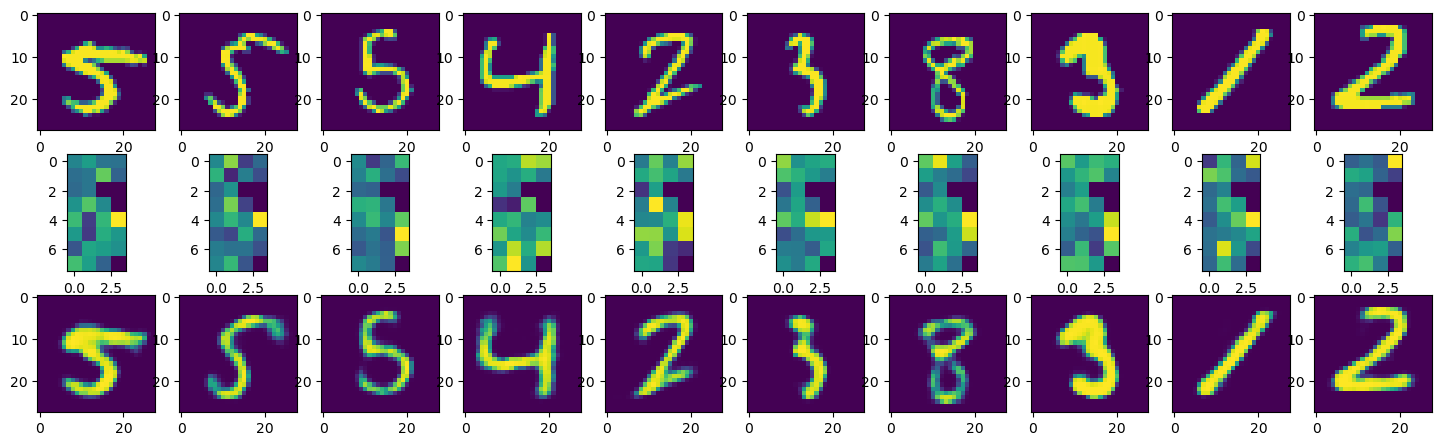

In [86]:
num_imagens = 10

imagens_teste = np.random.randint(previsores_teste.shape[0], size = num_imagens )

plt.figure( figsize = (18,18) )

for i, indice_imagem in enumerate(imagens_teste):
    print(i),
    print(indice_imagem),

    # Imagem Original
    eixto = plt.subplot(10, 10, i+1)
    plt.imshow(
        previsores_teste[indice_imagem].reshape( (28,28) )
    )
    plt.xticks()
    plt.yticks()

    # Imagem Codificada
    eixto = plt.subplot(10, 10, i+1 + num_imagens)
    plt.imshow(
        imagens_codificadas[indice_imagem].reshape( (8,4) )
    )
    plt.xticks()
    plt.yticks()

    # Imagem Reconstruida
    eixto = plt.subplot(10, 10, i+1 + num_imagens * 2)
    plt.imshow(
        imagens_decodificadas[indice_imagem].reshape( (28,28) )
    )
    plt.xticks()
    plt.yticks()

## Convolutional autoencoders

<img src = 'Imagens/convolutional-autoencoder.png' width = '700'>

### Import de Libs e dataset

In [87]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D, Flatten, Reshape

In [89]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

In [90]:
previsores_treinamento = previsores_treinamento.reshape(
    (len(previsores_treinamento), 28, 28, 1)
)
previsores_teste = previsores_teste.reshape(
    (len(previsores_teste), 28, 28, 1)
)

In [91]:
# Normalização dos valores

previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [92]:
previsores_treinamento.shape

(60000, 28, 28, 1)

In [93]:
previsores_teste.shape

(10000, 28, 28, 1)

### Criando o Autoencoder

In [99]:
autoencoder = Sequential()

# ENCODER
autoencoder.add( Conv2D(
    filters = 16,
    kernel_size= (3,3),
    activation= 'relu',
    input_shape = (28,28,1)
))
autoencoder.add( MaxPool2D(
    pool_size=(2,2)
))
autoencoder.add( Conv2D(
    filters = 8,
    kernel_size= (3,3),
    activation= 'relu',
    padding = 'same'                # Indica o formato da imagem
))
autoencoder.add( MaxPool2D(
    pool_size=(2,2),
    padding = 'same'                # Indica o formato da imagem
))

# 4 x 4 x 8
autoencoder.add( Conv2D(
    filters = 8,
    kernel_size= (3,3),
    activation= 'relu',
    padding = 'same',
    strides = (2,2)                 # Indica por quantos pixeis a img. deve passar
))

autoencoder.add( Flatten())

# DECODER

autoencoder.add( Reshape((4,4,8)) )

autoencoder.add( Conv2D(
    filters = 8,
    kernel_size= (3,3),
    activation= 'relu',
    padding = 'same'
))
autoencoder.add( UpSampling2D( size = (2,2)))
autoencoder.add( Conv2D(
    filters = 8,
    kernel_size= (3,3),
    activation= 'relu',
    padding = 'same'
))
autoencoder.add( UpSampling2D( size = (2,2)))
autoencoder.add( Conv2D(
    filters = 16,
    kernel_size= (3,3),
    activation= 'relu'                          # Não colocamos padding no ultimo decodificador
))
autoencoder.add( UpSampling2D( size = (2,2)))
autoencoder.add( Conv2D(
    filters = 1,
    kernel_size= (3,3),
    activation= 'sigmoid',
    padding = 'same'
))

autoencoder.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 4, 4, 8)         

In [100]:
autoencoder.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
autoencoder.fit(
    previsores_treinamento, 
    previsores_treinamento,
    epochs = 50,
    batch_size = 256,
    validation_data = (previsores_teste, previsores_teste)
)

Epoch 1/50
235/235 [==============================] - 11s 20ms/step - loss: 0.2834 - accuracy: 0.7867 - val_loss: 0.1641 - val_accuracy: 0.7974
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1471 - accuracy: 0.8023 - val_loss: 0.1336 - val_accuracy: 0.8045
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1279 - accuracy: 0.8071 - val_loss: 0.1213 - val_accuracy: 0.8074
Epoch 4/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1193 - accuracy: 0.8088 - val_loss: 0.1153 - val_accuracy: 0.8079
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1141 - accuracy: 0.8097 - val_loss: 0.1107 - val_accuracy: 0.8097
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1102 - accuracy: 0.8104 - val_loss: 0.1073 - val_accuracy: 0.8099
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1072 - accuracy: 0.8109 - val_loss: 0.1053 - val_accuracy: 0.811

In [104]:
encoder = Model(
    inputs = autoencoder.input,
    outputs = autoencoder.get_layer('flatten_4').output
)
encoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0   

0
1962
1
7192
2
7002
3
8002
4
7065
5
2435
6
9224
7
5851
8
3007
9
9787


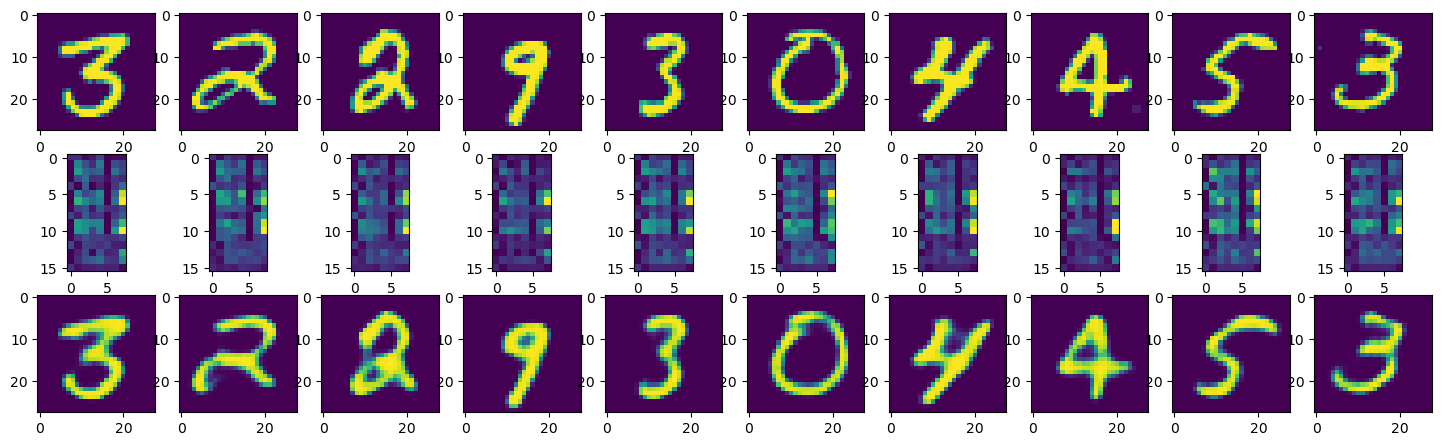

In [109]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

num_imagens = 10

imagens_teste = np.random.randint(previsores_teste.shape[0], size = num_imagens )

plt.figure( figsize = (18,18) )

for i, indice_imagem in enumerate(imagens_teste):
    print(i),
    print(indice_imagem),

    # Imagem Original
    eixto = plt.subplot(10, 10, i+1)
    plt.imshow(
        previsores_teste[indice_imagem].reshape( (28,28) )
    )
    plt.xticks()
    plt.yticks()

    # Imagem Codificada
    eixto = plt.subplot(10, 10, i+1 + num_imagens)
    plt.imshow(
        imagens_codificadas[indice_imagem].reshape( (16,8) )
    )
    plt.xticks()
    plt.yticks()

    # Imagem Reconstruida
    eixto = plt.subplot(10, 10, i+1 + num_imagens * 2)
    plt.imshow(
        imagens_decodificadas[indice_imagem].reshape( (28,28) )
    )
    plt.xticks()
    plt.yticks()

**Em geral, o encoder convolucional gera resultados melhores**

### TESTANDO A DIFERENÇA DE PERFORMANCE 

### Import de Libs e dataset

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D, Flatten, Reshape

In [9]:
(previsores_treinamento, classe_treinamento), (previsores_teste, classe_teste) = mnist.load_data()

In [10]:
previsores_treinamento = previsores_treinamento.reshape(
    (len(previsores_treinamento), 28, 28, 1)
)
previsores_teste = previsores_teste.reshape(
    (len(previsores_teste), 28, 28, 1)
)

In [11]:
# Normalização dos valores

previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [12]:
previsores_treinamento.shape

(60000, 28, 28, 1)

In [13]:
previsores_teste.shape

(10000, 28, 28, 1)

### Preparando os datasets e criando o autoencoder

In [15]:
autoencoder = Sequential()

# ENCODER
autoencoder.add( Conv2D(
    filters = 16,
    kernel_size= (3,3),
    activation= 'relu',
    input_shape = (28,28,1)
))
autoencoder.add( MaxPool2D(
    pool_size=(2,2)
))
autoencoder.add( Conv2D(
    filters = 8,
    kernel_size= (3,3),
    activation= 'relu',
    padding = 'same'                # Indica o formato da imagem
))
autoencoder.add( MaxPool2D(
    pool_size=(2,2),
    padding = 'same'                # Indica o formato da imagem
))

# 4 x 4 x 8
autoencoder.add( Conv2D(
    filters = 8,
    kernel_size= (3,3),
    activation= 'relu',
    padding = 'same',
    strides = (2,2)                 # Indica por quantos pixeis a img. deve passar
))

autoencoder.add( Flatten())

# DECODER

autoencoder.add( Reshape((4,4,8)) )

autoencoder.add( Conv2D(
    filters = 8,
    kernel_size= (3,3),
    activation= 'relu',
    padding = 'same'
))
autoencoder.add( UpSampling2D( size = (2,2)))
autoencoder.add( Conv2D(
    filters = 8,
    kernel_size= (3,3),
    activation= 'relu',
    padding = 'same'
))
autoencoder.add( UpSampling2D( size = (2,2)))
autoencoder.add( Conv2D(
    filters = 16,
    kernel_size= (3,3),
    activation= 'relu'                          # Não colocamos padding no ultimo decodificador
))
autoencoder.add( UpSampling2D( size = (2,2)))
autoencoder.add( Conv2D(
    filters = 1,
    kernel_size= (3,3),
    activation= 'sigmoid',
    padding = 'same'
))

autoencoder.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
autoencoder.fit(
    previsores_treinamento, 
    previsores_treinamento,
    epochs = 40,
    batch_size = 256,
    validation_data = (previsores_teste, previsores_teste)
)

Epoch 1/40
235/235 [==============================] - 5s 19ms/step - loss: 0.2602 - accuracy: 0.7942 - val_loss: 0.1580 - val_accuracy: 0.7944
Epoch 2/40
235/235 [==============================] - 3s 15ms/step - loss: 0.1429 - accuracy: 0.8022 - val_loss: 0.1304 - val_accuracy: 0.8044
Epoch 3/40
235/235 [==============================] - 4s 15ms/step - loss: 0.1261 - accuracy: 0.8070 - val_loss: 0.1202 - val_accuracy: 0.8074
Epoch 4/40
235/235 [==============================] - 3s 15ms/step - loss: 0.1184 - accuracy: 0.8088 - val_loss: 0.1142 - val_accuracy: 0.8085
Epoch 5/40
235/235 [==============================] - 3s 15ms/step - loss: 0.1134 - accuracy: 0.8097 - val_loss: 0.1105 - val_accuracy: 0.8099
Epoch 6/40
235/235 [==============================] - 4s 15ms/step - loss: 0.1100 - accuracy: 0.8104 - val_loss: 0.1077 - val_accuracy: 0.8105
Epoch 7/40
235/235 [==============================] - 4s 15ms/step - loss: 0.1074 - accuracy: 0.8108 - val_loss: 0.1051 - val_accuracy: 0.8106

In [16]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)          

In [17]:
encoder = Model(
    inputs = autoencoder.input,
    outputs = autoencoder.get_layer('flatten_1').output
)

In [18]:
previsores_treinamento_codificados = encoder.predict( previsores_treinamento )

previsores_teste_codificados = encoder.predict( previsores_teste )

In [19]:
classe_treinamento.shape

(60000,)

In [20]:
classe_dummy_treinamento = to_categorical(classe_treinamento)

classe_dummy_teste = to_categorical(classe_teste)

In [21]:
classe_dummy_treinamento.shape

(60000, 10)

### Realizando a modelagem

#### SEM REDUÇÃO DE DIMENSIONALIDADE

In [22]:
previsores_treinamento = previsores_treinamento.reshape(
    (len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:]))
)
previsores_teste = previsores_teste.reshape(
    (len(previsores_teste), np.prod(previsores_teste.shape[1:]))
)

In [23]:
c1 = Sequential()

c1.add(Dense(
    units = 397,
    activation= 'relu',
    input_dim= 784
))
c1.add(Dense(
    units = 397,
    activation= 'relu'
))
c1.add(Dense(
    units = 10,
    activation= 'softmax'
))

c1.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
c1.fit(
    previsores_treinamento, 
    classe_dummy_treinamento,
    batch_size = 256,
    epochs = 100,
    validation_data = (previsores_teste, classe_dummy_teste)   
)

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.2909 - accuracy: 0.9167 - val_loss: 0.1233 - val_accuracy: 0.9612
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1001 - accuracy: 0.9696 - val_loss: 0.0894 - val_accuracy: 0.9708
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0613 - accuracy: 0.9819 - val_loss: 0.0753 - val_accuracy: 0.9762
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0734 - val_accuracy: 0.9770
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0710 - val_accuracy: 0.9780
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0718 - val_accuracy: 0.9784
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 0.0725 - val_accuracy: 0.9790

#### COM REDUÇÃO DE DIMENSIONALIDADE

In [24]:
previsores_treinamento_codificados.shape

(60000, 128)

In [26]:
c2 = Sequential()

c2.add(Dense(
    units = 21,
    activation= 'relu',
    input_dim= 128
))
c2.add(Dense(
    units = 21,
    activation= 'relu'
))
c2.add(Dense(
    units = 10,
    activation= 'softmax'
))

c2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
c2.fit(
    previsores_treinamento_codificados, 
    classe_dummy_treinamento,
    batch_size = 256,
    epochs = 100,
    validation_data = (previsores_teste_codificados, classe_dummy_teste)   
)

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 1.6073 - accuracy: 0.4996 - val_loss: 0.7477 - val_accuracy: 0.7869
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5810 - accuracy: 0.8292 - val_loss: 0.4388 - val_accuracy: 0.8757
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4097 - accuracy: 0.8799 - val_loss: 0.3480 - val_accuracy: 0.8955
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3483 - accuracy: 0.8972 - val_loss: 0.3017 - val_accuracy: 0.9102
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3148 - accuracy: 0.9068 - val_loss: 0.2795 - val_accuracy: 0.9160
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.2908 - accuracy: 0.9132 - val_loss: 0.2662 - val_accuracy: 0.9201
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.2733 - accuracy: 0.9175 - val_loss: 0.2440 - val_accuracy: 0.9261

**SEM REDUÇÃO**
* Tempo de execução: 1min 31s
* Accuracy = 0.9836

**COM REDUÇÃO**
* Tempo de execução: 1min 19s
* Accuracy = 0.9628